In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)


In [4]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df=df[['petal length (cm)','petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=['petal length (cm)','petal width (cm)'])
df_scaled.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


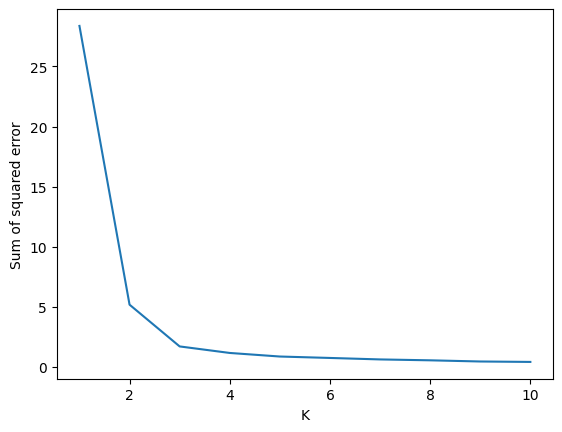

In [9]:
sse=[]
k_rng=range(1,11)
for k in k_rng:
    kn=KMeans(n_clusters=k)
    kn.fit(df_scaled)
    sse.append(kn.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

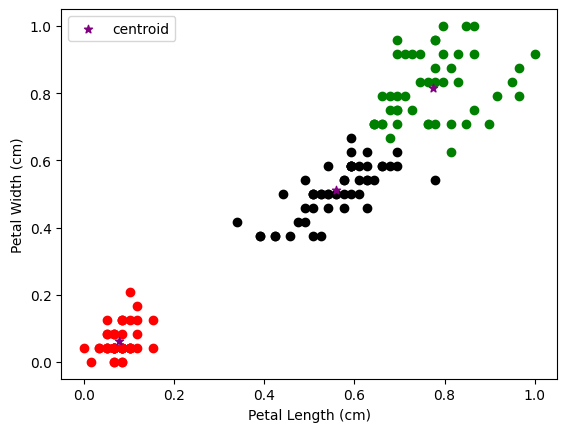

In [14]:
kn=KMeans(n_clusters=3)
y_pred=kn.fit_predict(df_scaled)
df_scaled['cluster']=y_pred
df_scaled.head()

df1=df_scaled[df_scaled.cluster==0]
df2=df_scaled[df_scaled.cluster==1]
df3=df_scaled[df_scaled.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color='purple',marker='*', label='centroid')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()